# Der NeuronRank-Algorithmus

In [1]:
import numpy as np
import tensorflow as tf
import model_cnn
import preprocessing_classification as pre_c
import matplotlib.pyplot as plt

In [2]:
sess = tf.InteractiveSession()

text_length = 1000
num_authors = 5
input_cnn = tf.placeholder(tf.float32, [None, len(pre_c.alphabet), text_length, 1], name="input_x")
with tf.variable_scope("cnn"):
    cnn_logits, cnn_variables, _ = model_cnn.inference(
            input_x=input_cnn, keep_prob=1.0, num_authors=num_authors)
known_vars = []
known_vars = tf.global_variables()
saver = tf.train.Saver(var_list=known_vars)
saver.restore(sess, "../resources/1511967049/saves/cnn.ckpt-00009384")

INFO:tensorflow:Restoring parameters from ../resources/1511967049/saves/cnn.ckpt-00009384


In [3]:
w_1 = sess.run('cnn/conv-maxpool-1/W:0')
b_1 = sess.run('cnn/conv-maxpool-1/b:0')
w_2 = sess.run('cnn/conv-maxpool-2/W:0')
b_2 = sess.run('cnn/conv-maxpool-2/b:0')
w_3 = sess.run('cnn/conv-3/W:0')
b_3 = sess.run('cnn/conv-3/b:0')
w_4 = sess.run('cnn/conv-4/W:0')
b_4 = sess.run('cnn/conv-4/b:0')
w_5 = sess.run('cnn/conv-5/W:0')
b_5 = sess.run('cnn/conv-5/b:0')
w_6 = sess.run('cnn/conv-maxpool-6/W:0')
b_6 = sess.run('cnn/conv-maxpool-6/b:0')
w_fc = sess.run('cnn/fc/W-fc:0')
b_fc = sess.run('cnn/fc/b-fc:0')
weights = [w_1, w_2, w_3, w_4, w_5, w_6, w_fc]
biases = [b_1, b_2, b_3, b_4, b_5, b_6, b_fc]

In [4]:
for wi,w in enumerate(weights):
    weights[wi] = np.squeeze(w)
weights[0] = np.transpose(weights[0], [1,0,2])
weights[-1] = np.reshape(weights[-1], [980,256,5])
layers = [input_cnn.shape[1:3][::-1]] + [v.shape[-2:] for v in cnn_variables[:-1]] + [cnn_logits.shape[1:2]]

In [5]:
# RAM-sparende Implementierung

def get_NR_matrices(start = np.array([0.0,1.0,0.0,0.0,0.0]), startlayer = 0, numlayers=100):
    NR_matrices = []
    NR_matrices.append(start)
    if startlayer < 1:
        NR_matrices.append(np.sum(weights[-1]*NR_matrices[-1], axis=2))
        if numlayers < 3:
            return NR_matrices
    
    for i in range(2+startlayer,len(layers)):
        nr_pre = np.zeros([layers[-(i+1)][0], layers[-(i+1)][1]])
        ws = np.pad(weights[-i], ((0,int(layers[-(i+1)][0]-weights[-i].shape[0])),(0,0),(0,0)), mode='constant')
        print(ws.shape)
        for k in range(NR_matrices[-1].shape[0]):
            nr_pre = np.add(nr_pre, np.sum(np.multiply(np.roll(ws, shift=k, axis=0), NR_matrices[-1][k,:]), axis=2))
        NR_matrices.append(nr_pre)
        if numlayers == i+1-startlayer:
            return NR_matrices
    return NR_matrices

In [6]:
NR_ms = []
for i in range(5):
    start = np.zeros(5)
    start[i] = 1
    NR_ms.append(get_NR_matrices(start, startlayer=0))

(982, 256, 256)
(984, 256, 256)
(986, 256, 256)
(988, 256, 256)
(994, 256, 256)
(1000, 70, 256)
(982, 256, 256)
(984, 256, 256)
(986, 256, 256)
(988, 256, 256)
(994, 256, 256)
(1000, 70, 256)
(982, 256, 256)
(984, 256, 256)
(986, 256, 256)
(988, 256, 256)
(994, 256, 256)
(1000, 70, 256)
(982, 256, 256)
(984, 256, 256)
(986, 256, 256)
(988, 256, 256)
(994, 256, 256)
(1000, 70, 256)
(982, 256, 256)
(984, 256, 256)
(986, 256, 256)
(988, 256, 256)
(994, 256, 256)
(1000, 70, 256)


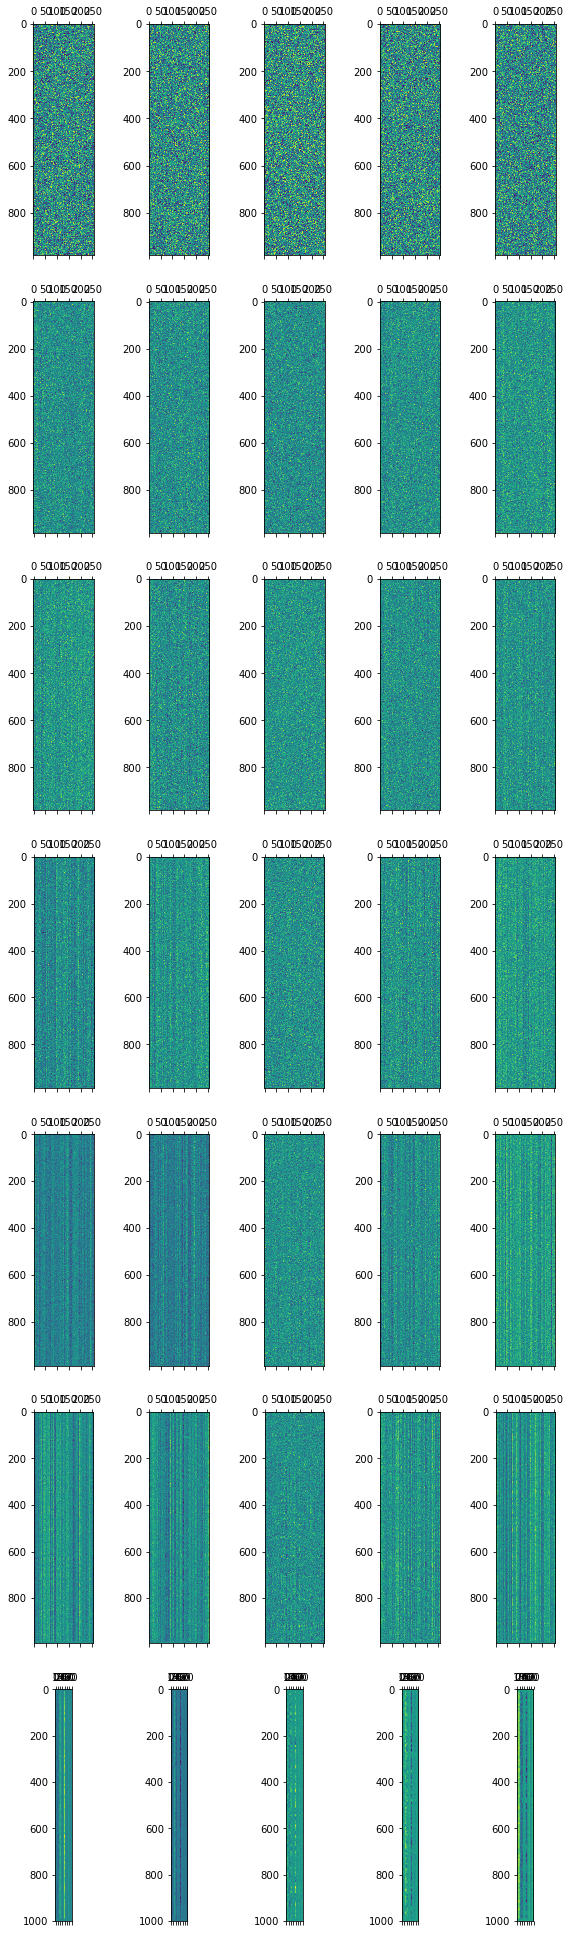

In [7]:
fig = plt.figure(figsize=[10,40])
plotctr=1
for zipped in zip(NR_ms[0][1:], NR_ms[1][1:], NR_ms[2][1:], NR_ms[3][1:], NR_ms[4][1:]):
    for mat in zipped:
        ax = fig.add_subplot(8,5,plotctr)
        ax.matshow(np.repeat(mat, 1, axis=1))
        plotctr+=1
plt.show()